# Part II - (ProsperLoanData)
## by (Sharon Tulwo)


## Investigation Overview   
> The overall goal of the persentation is to discovery:  
>1. How character,capacity,conditions of credit analysis affect the credit score    
>2. How the cost of loan affect loan uptake   
>3. Factors that affect loan outcome status   
### Summary of Key Insights  
> i. ProsperScore has a negative correlation with EstimatedReturn,DebtToIncomeRatio,BorrowerAPR,BorrowerRate,LenderYield. And Positive Correlation to Investors, MothlyLoanPayment, LoanOriginalAmount   
> ii. All badLoans with LoanStatus as (Chargedoff,PastDue,Defaulted) have  higher BorrowerAPR across all EmploymentStatus categories    
> iii. When the Cost of loan is higher and the credit Score is bad the Loan status type results to badloan      
> iv. The Term of the loans is calculated based on the loanOriginalAmount and the MonthlyLoanPayment    
## Dataset Overview  
> The dataset is Loan data from prosper    
> The dataset cointains 113937 Rows and 81 columns 61 Columns are numeric  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# Subset the dataset
columns= ['Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedReturn','ProsperRating (numeric)',
          'ProsperRating (Alpha)','ProsperScore','Occupation','EmploymentStatus','IsBorrowerHomeowner',
         'AmountDelinquent','DelinquenciesLast7Years','DebtToIncomeRatio','IncomeRange','IncomeVerifiable',
          'StatedMonthlyIncome','TotalProsperLoans','LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment','PercentFunded','Investors','ListingCategory (numeric)']
df_loans=df[columns]
df_loans.info()
# data wrangling
# Select dataset with date from 2009
df_loans = df_loans[df_loans['LoanOriginationDate']>='2009-01-01 00:00:00']
#convert datatype to category for all categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory (numeric)'] = df_loans['ListingCategory (numeric)'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')
df_loans['IncomeRange'] = df_loans['IncomeRange'].astype('category')
df_loans['ProsperRating (Alpha)'] = df_loans['ProsperRating (Alpha)'].astype('category')
df_loans['ProsperRating (numeric)'] = df_loans['ProsperRating (numeric)'].astype('category')
#convert datatype to datetime for all date columns
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   EstimatedReturn            84853 non-null   float64
 6   ProsperRating (numeric)    84853 non-null   float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  AmountDelinquent           106315 non-null  float64
 13  DelinquenciesLast7Years    11

## 1. Heatmap Correlation Matrix between Quantitative Variables
> The relationship between quantitative variables of interest show that:  
> i. ProsperScore has a negative correlation with EstimatedReturn,DebtToIncomeRatio,BorrowerAPR,BorrowerRate,LenderYield. And Positive Correlation to Investors, MothlyLoanPayment, LoanOriginalAmount    
> ii. There is a positive correlation between EstimatedReturn,BorrowerAPR,BorrowerRate and LenderYield  
> iii. Investors have a positive correlation with MothlyLoanPayment, LoanOriginalAmount and ProsperScore  


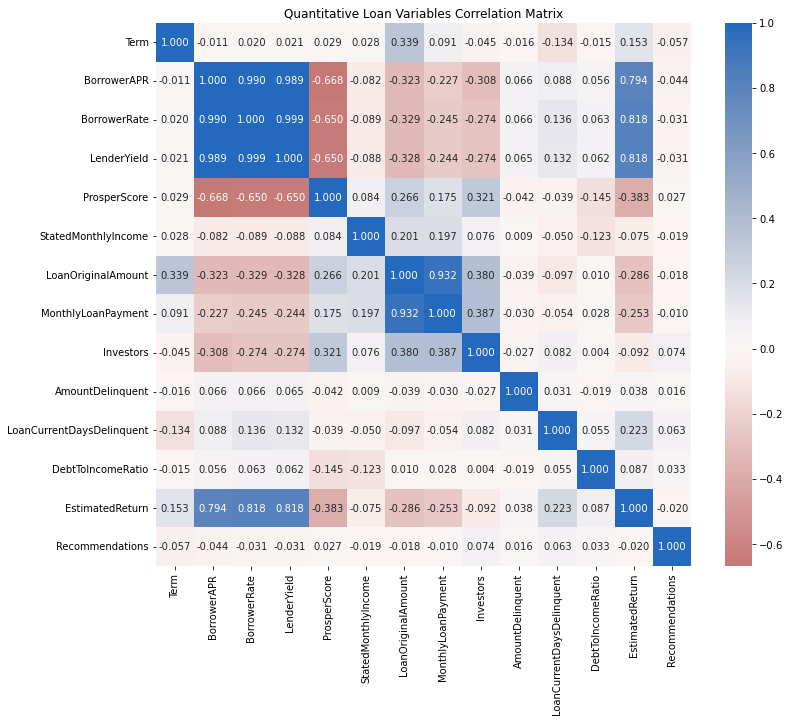

In [3]:
Quantitative_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment','Investors','AmountDelinquent','LoanCurrentDaysDelinquent',
                     'DebtToIncomeRatio','EstimatedReturn','Recommendations']
plt.figure(figsize = [12,10])
sb.heatmap(df[Quantitative_variables].corr(), annot=True, fmt='.3f',cmap='vlag_r',center=0).set(title='Quantitative Loan Variables Correlation Matrix');


## 2. LoanStatus vs BorrowerAPR vs EmploymentStatus Boxplot
> How the cost of loan and capacity of loan uptake affects the status of the loan.  
> i. All badLoans with LoanStatus as (Chargedoff,PastDue,Defaulted) have  higher BorrowerAPR across all EmploymentStatus categories  
> ii. The EmploymentStatus, Not-employed has the highest BorrowerAPR. This show that its more risky   

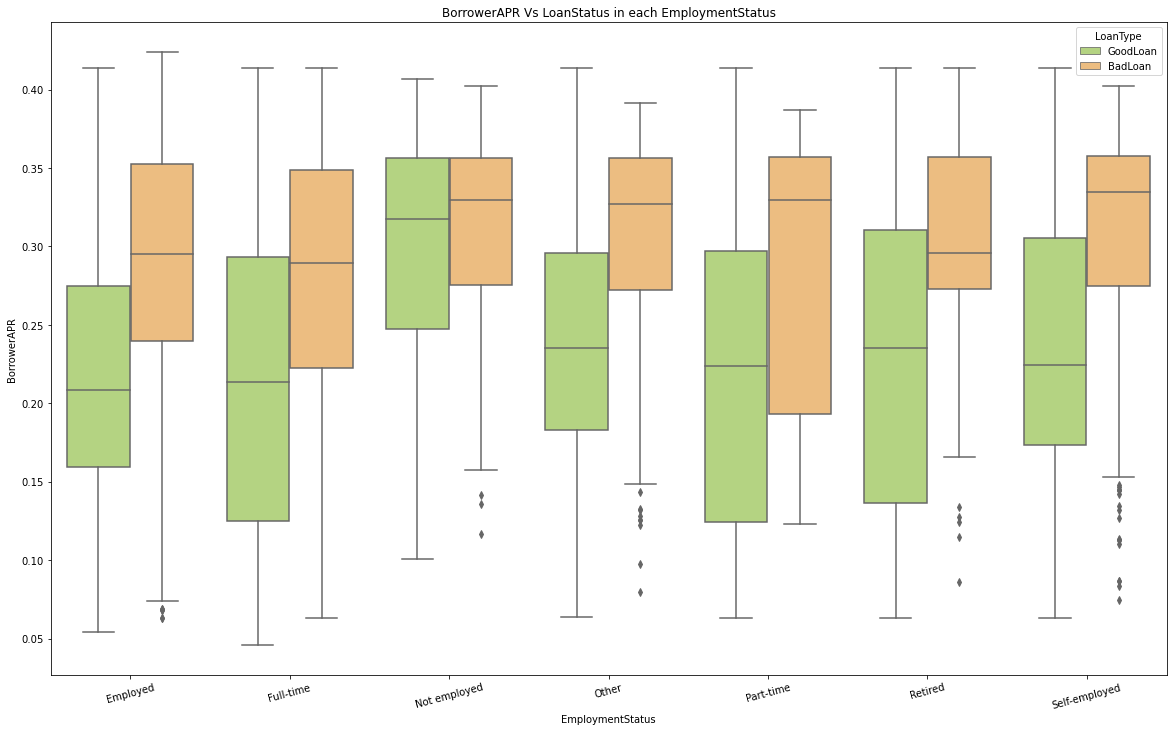

In [4]:
# Categorize loans into goodloans and badloans types
# create list for goodloans
goodLoans = ['Current','Completed','FinalPaymentInProgress']
# function to check loan type
def find_loan_type(LoanStatus):
    if LoanStatus in goodLoans:
        return 'GoodLoan'
    else:
        return 'BadLoan'
    
df_loans['LoanType'] = df_loans['LoanStatus'].apply(find_loan_type)
plt.figure(figsize=[20,12])
sb.boxplot(x="EmploymentStatus", y="BorrowerAPR", hue="LoanType", data=df_loans, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('EmploymentStatus');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

## 3. ProsperScore vs BorrowerRate vs LoanType Catplot 

> How the cost of loan and credit score affect the status of the loan:  
> i. The Better or higher the prosper Score yields lower Borrower rates.  
>ii. on all prosper Score categories the bad loans have a higher Borrower rate  
> When the Cost of loan is higher and the credit Score is bad the Loan status type results to badloan  

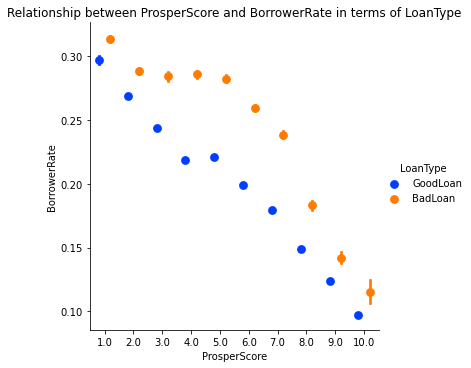

In [5]:
df_loans = df_loans[df_loans['ProsperScore'] <= 10]
sb.catplot(x='ProsperScore', y='BorrowerRate', data=df_loans, palette='bright',kind='point',hue='LoanType',
           linestyles = '',dodge = 0.4). set(title='Relationship between ProsperScore and BorrowerRate in terms of LoanType');

## 4. LoanOriginalAmount vs MonthlyLoanPayment vs Term scatterplot 

>  What is the relationship on LoanOriginalAmount,MonthlyLoanPayment and Term:  
> i.  As the Term period decreases the Monthly Loan Payment Variable Increases.  
> ii. As the LoanOriginalAmount increases the Term period increases  
> The Term of the loans is calculated based on the loanOriginalAmount and the MonthlyLoanPayment  

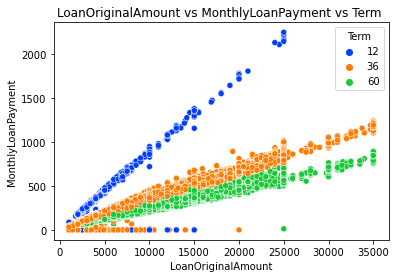

In [6]:
sb.scatterplot(x='LoanOriginalAmount',y='MonthlyLoanPayment',data=df_loans,palette='bright',hue='Term'). set(title='LoanOriginalAmount vs MonthlyLoanPayment vs Term ');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 873375 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ctulw\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ctulw\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\ctulw\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ctulw\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\ctulw\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\ctulw\